In [2]:
import requests
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [118]:
url = "https://jobicy.p.rapidapi.com/api/v2/remote-jobs"

# Request headers
headers = {
    "X-RapidAPI-Key": "d193e29157msh16cba69f1b99500p1aa91cjsn89fb8a04c8a6",
    "X-RapidAPI-Host": "jobicy.p.rapidapi.com"
}

# Make the API request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a pandas DataFrame
    data = response.json()['jobs']
    df = pd.DataFrame(data)
    
    # Save the DataFrame to a CSV file
    df.to_csv('jobs1.csv', index=False)
    
    print("Data has been successfully saved to 'jobs1.csv'")
else:
    print(f"Error in obtaining data: {response.status_code}")

Data has been successfully saved to 'jobs1.csv'


# EDA

In [3]:
jobs1 = pd.read_csv('jobs1.csv')
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
jobs1.shape

(3755, 11)

In [5]:
jobs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


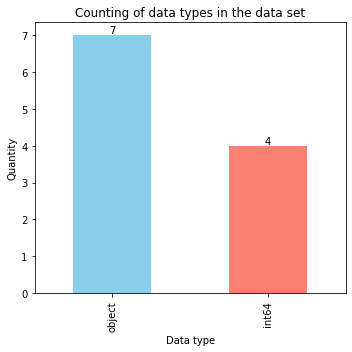

In [6]:
import matplotlib.pyplot as plt

data_types_counts = jobs1.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

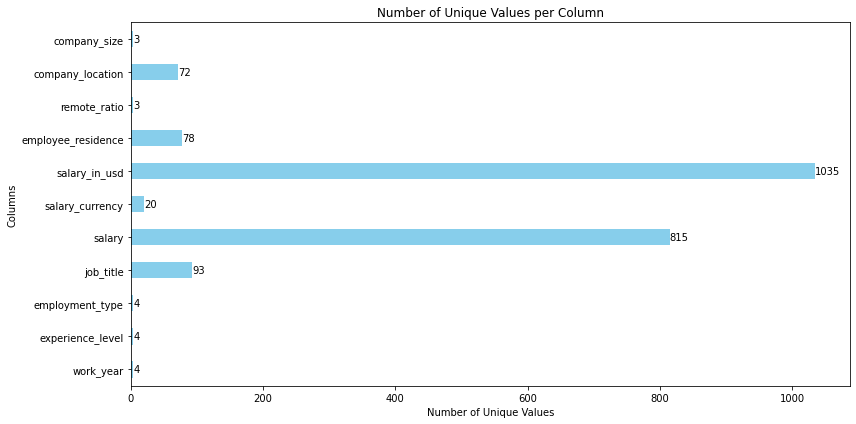

In [7]:
import matplotlib.pyplot as plt


unique_counts = jobs1.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

In [8]:
print(jobs1.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [9]:
jobs1.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [10]:
jobs1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Check duplicated:

In [11]:
jobs1.duplicated().sum()

1171

1. Transformation #1: Drop duplicates

In [12]:
jobs1=jobs1.drop_duplicates()
jobs1.duplicated().sum()

0

- Data Types: The data types of our dataset are accurate and appropriate for our analysis, indicating that the data is well-structured.

- Missing Values: We found no missing values in our dataset. This suggests that our data is complete and ready for analysis without the need for imputation.

- Duplicate Entries: Initially, there were 1351 duplicate entries in the dataset. However, we have successfully removed these duplicate rows, ensuring data integrity for our analysis.

These observations assure us that our dataset is in good shape and suitable for further analysis and insights.

###  Checking Unique Values in Selected Columns

In this step, we will examine the unique values in certain columns, such as:

- Experience Level
- Employment Type
- Company Size
The purpose of this step is to identify values that may need to be replaced with more appropriate and standardized terms.

In [13]:
unique_experience_levels = jobs1['experience_level'].unique()
unique_employment_types = jobs1['employment_type'].unique()
unique_company_sizes = jobs1['company_size'].unique()

print("Unique Experience Levels:", unique_experience_levels)
print("Unique Employment Types:", unique_employment_types)
print("Unique Company Sizes:", unique_company_sizes)

Unique Experience Levels: ['SE' 'MI' 'EN' 'EX']
Unique Employment Types: ['FT' 'CT' 'FL' 'PT']
Unique Company Sizes: ['L' 'S' 'M']


In [14]:
# Replace specific values in the 'experience_level' column
jobs1.loc[:, 'experience_level'] = jobs1['experience_level'].replace({
    'EN': 'Entry Level',
    'EX': 'Experienced',
    'MI': 'Mid-Level',
    'SE': 'Senior'  # Corregido el typo de 'Seniour' a 'Senior'
})

# Replace specific values in the 'employment_type' column
jobs1.loc[:, 'employment_type'] = jobs1['employment_type'].replace({
    'FT': 'Full time',
    'PT': 'Part time',
    'CT': 'Contractor',
    'FL': 'Freelancer'
})

# Replace specific values in the 'company_size' column
jobs1.loc[:, 'company_size'] = jobs1['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'  # Corregido el typo de 'small' a 'Small'
})


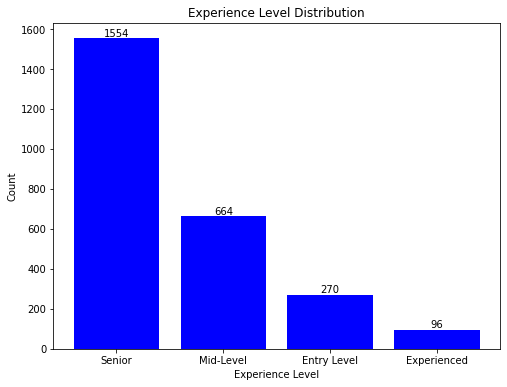

In [15]:
# Calcular el recuento de valores en la columna 'experience_level'
experience_level_counts = jobs1["experience_level"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

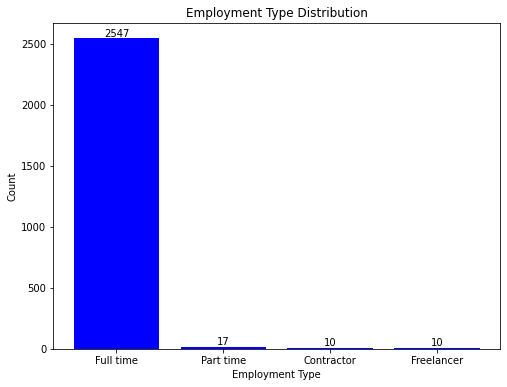

In [16]:
# Calcular el recuento de valores en la columna 'experience_level'
experience_level_counts = jobs1["employment_type"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

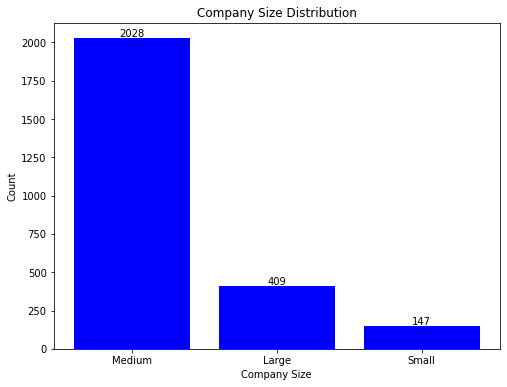

In [17]:
# Calcular el recuento de valores en la columna 'experience_level'
company_size_counts = jobs1["company_size"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(company_size_counts.index, company_size_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

Let's check how many times the job titles are repeated.

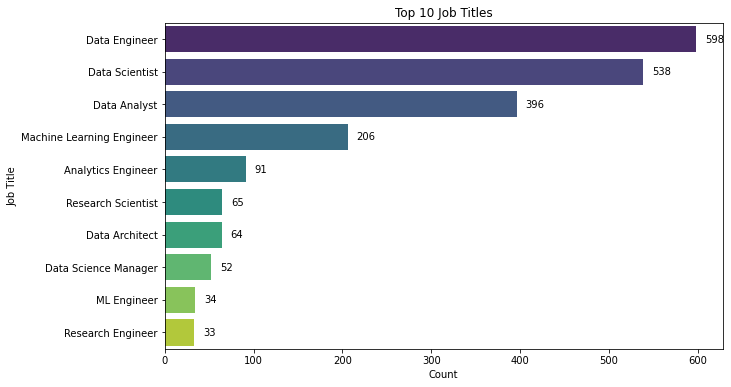

In [18]:
# Calculate the top 10 most common job titles
top_job_titles = jobs1['job_title'].value_counts().nlargest(10)

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Generate a bar plot using seaborn
barplot = sns.barplot(y=top_job_titles.index, x=top_job_titles.values, hue=top_job_titles.index, palette='viridis', legend=False)

# Add text annotations to the bar plot
for i in range(top_job_titles.shape[0]):
    barplot.text(top_job_titles.iloc[i] + 10, i, top_job_titles.iloc[i], va='center')

# Add title and labels to the plot
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Display the plot
plt.show()

In [19]:
# Define a dictionary for job roles and their corresponding salaries
job_roles = {
    'Data Engineer': 'Data Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Analytics Engineer': 'Analytics Engineer'}

# Iterate over the job roles and calculate the highest, lowest, and average salaries
for role, title in job_roles.items():
    salaries = jobs1[jobs1['job_title'] == title]['salary_in_usd']
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Print the salary summary for each role
    print(role + ':')
    print('  - Highest Salary:', max_salary)
    print('  - Lowest Salary:', min_salary)
    print('  - Average Salary:', avg_salary)
    print()

Data Engineer:
  - Highest Salary: 324000
  - Lowest Salary: 12000
  - Average Salary: 139861

Data Scientist:
  - Highest Salary: 412000
  - Lowest Salary: 5679
  - Average Salary: 132974

Data Analyst:
  - Highest Salary: 430967
  - Lowest Salary: 5723
  - Average Salary: 105324

Machine Learning Engineer:
  - Highest Salary: 342300
  - Lowest Salary: 12000
  - Average Salary: 147466

Analytics Engineer:
  - Highest Salary: 289800
  - Lowest Salary: 7500
  - Average Salary: 150151



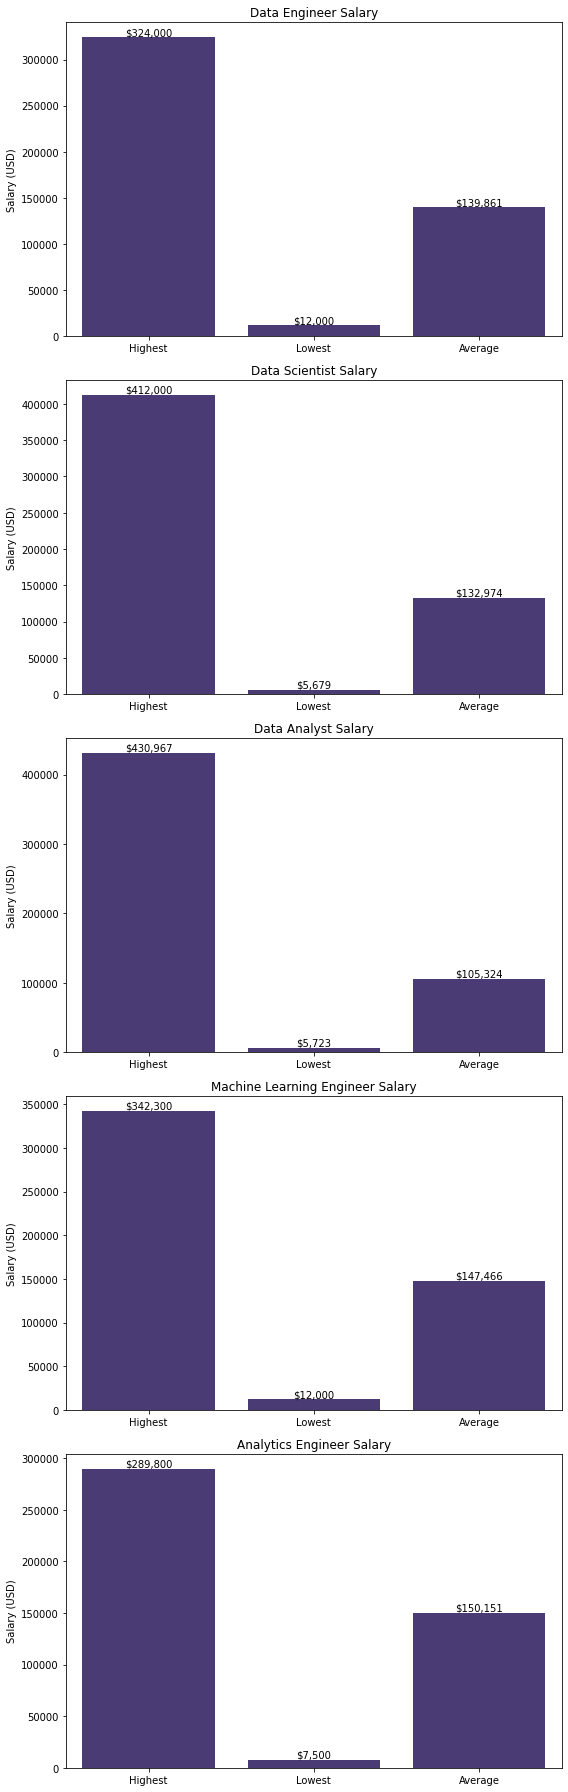

In [20]:
# Define the job roles
job_roles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# Set the seaborn palette
sns.set_palette("viridis")

# Create a grid of subplots for job roles' salary summary
fig, axs = plt.subplots(len(job_roles), 1, figsize=(8, 5 * len(job_roles)))

# Iterate over job roles
for i, role in enumerate(job_roles):
    # Filter the dataset for the specific job role
    salaries = jobs1[jobs1['job_title'] == role]['salary_in_usd']
    
    # Calculate the highest, lowest, and average salaries
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Plot the salary summary
    sns.barplot(x=['Highest', 'Lowest', 'Average'], y=[max_salary, min_salary, avg_salary], ax=axs[i])
    axs[i].set_title(f'{role} Salary')
    axs[i].set_ylabel('Salary (USD)')
    
    # Add value labels to the bars
    for j, value in enumerate([max_salary, min_salary, avg_salary]):
        axs[i].text(j, value, f'${value:,}', ha='center', va='bottom')

# Adjust spacing between subplots and remove any excess blank space
plt.tight_layout()

# Show the plot
plt.show()

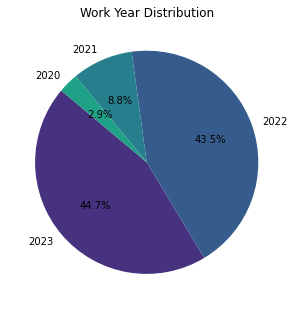

In [21]:
work_year_counts = jobs1['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()

In [22]:
average_salary_by_job_title = jobs1.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).astype(int)
print('\nAverage Salary by Job Title:');print(average_salary_by_job_title)


Average Salary by Job Title:
job_title
Data Science Tech Lead           375000
Cloud Data Architect             250000
Data Lead                        212500
Data Analytics Lead              211254
Principal Data Scientist         198171
                                  ...  
Autonomous Vehicle Technician     26277
3D Computer Vision Researcher     21352
Staff Data Analyst                15000
Product Data Scientist             8000
Power BI Developer                 5409
Name: salary_in_usd, Length: 93, dtype: int32


The job title with the highest average salary is "Data Science Tech Lead", with an average salary of $375,000.

The job title with the lowest average salary is "Power BI Developer", with an average salary of $5,409

### Salary Analysis

In [25]:
average_salary = jobs1.groupby(["experience_level", "employment_type"])["salary_in_usd"].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary

,experience_level,employment_type,salary_in_usd
4,Experienced,Contractor,416000.000000
5,Experienced,Full time,188710.610526
12,Senior,Full time,154165.019367
8,Mid-Level,Full time,102742.781874
10,Senior,Contractor,97500.000000
6,Mid-Level,Contractor,78600.000000
1,Entry Level,Freelancer,75000.000000
2,Entry Level,Full time,74564.626984
0,Entry Level,Contractor,65234.500000
11,Senior,Freelancer,53333.333333


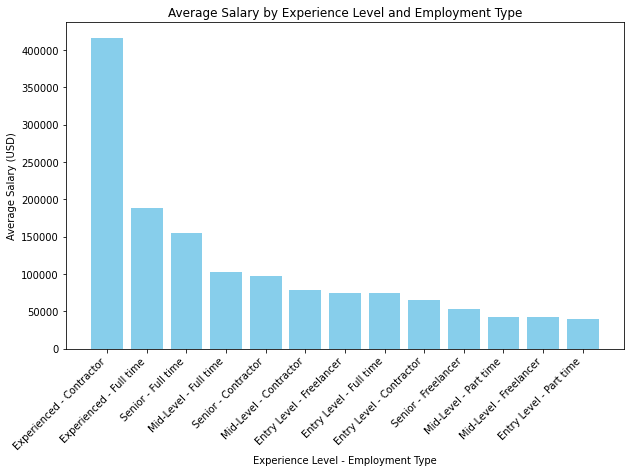

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_salary)), average_salary['salary_in_usd'], color='skyblue')
plt.xticks(range(len(average_salary)), average_salary['experience_level'] + " - " + average_salary['employment_type'], rotation=45, ha="right")
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level - Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

- Experienced - Contractor: Experienced contractors have the highest average salary shown on the graph.

- Senior - Full Time: Full-time senior employees have a high average salary.

- Mid-Level - Full Time: Full-time mid-level employees show a lower salary range than the previous ones.

- Entry Level - Part Time: Part-time entry-level employees have the lowest average salary shown on this graph.

The graph shows how the average salary varies not only with the level of experience but also with the type of employment, with experienced contractors having the highest income potential.

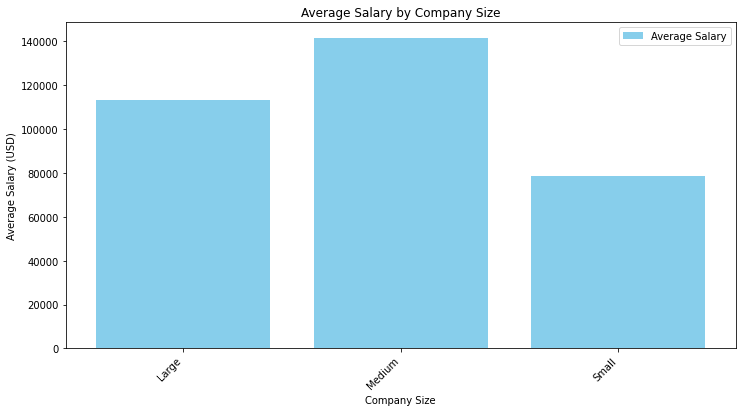

In [27]:
avg_salary_by_size = jobs1.groupby("company_size")["salary_in_usd"].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_size.index, avg_salary_by_size['salary_in_usd'], color='skyblue', label='Average Salary')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.xticks(avg_salary_by_size.index, avg_salary_by_size['company_size'], rotation=45, ha="right")
plt.legend()
plt.show()

- Large Companies: The bar for large companies shows an average salary of just over 120,000 USD.

- Medium Companies: The bar for medium companies also shows an average salary of just over 120,000 USD, but slightly less than that of large companies.

- Small Companies: The bar for small companies shows a significantly lower average salary of around 60,000 USD.

The graph shows that large and medium companies offer similar average salaries, which are significantly higher compared to small companies.

### Average Salary and Experience Level relation

C:\Users\emman\AppData\Local\Temp\ipykernel_5692\982552669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=jobs1, palette='viridis')


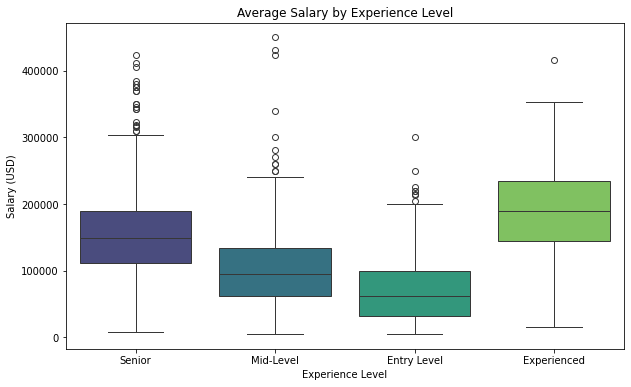

In [28]:
# Relacion entre average salary y experience level

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=jobs1, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()


- Senior: Dark blue box with several outliers, indicating higher variability in salaries.

- Mid-Level: Light blue box with fewer outliers compared to Senior level.

- Entry Level: Light green box with minimal outliers, showing the least salary range.

- Experienced: Dark green box with one outlier, suggesting a high salary potential for experienced professionals.

The graph illustrates that as the experience level increases, so does the average salary, with experienced professionals earning the most. The presence of outliers, especially at the Senior and Experienced levels, suggests that there can be significant variations in salaries within those categories.

### Average Salary with Employment Type relation 


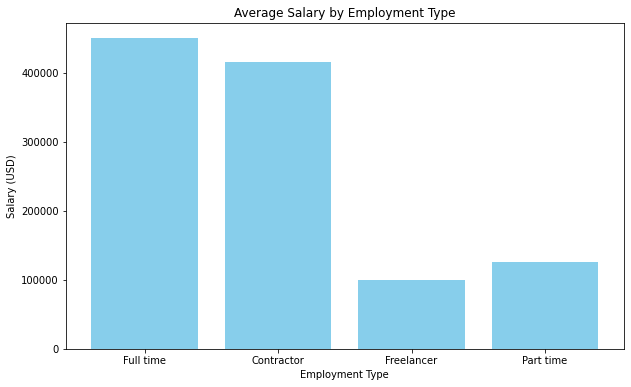

In [31]:
# Average salary by employment type

plt.figure(figsize=(10, 6))
barplot = plt.bar(jobs1['employment_type'], jobs1['salary_in_usd'], color='skyblue')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()


- Full Time: Full-time employees have one of the highest average salaries, with the bar reaching up to 400,000 USD.

- Contractor: Contractors also have high average salaries, comparable to full-time employees.

- Freelancer: Freelancers have a significantly lower average salary, as indicated by a shorter bar.

- Part Time: Part-time employees have the lowest average salary, with the shortest bar on the graph.

This graph illustrates the differences in average salaries based on the type of employment, with full-time and contract positions generally offering higher salaries compared to freelance and part-time work.